In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('./DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.shape

(9120, 272)

In [5]:
df.info

<bound method DataFrame.info of       T_xacc_mean  T_xacc_max  T_xacc_min  T_xacc_var  T_xacc_std  \
0        7.975714      8.1605      7.6823    0.014395    0.119981   
1        7.978250      8.1763      7.8472    0.007551    0.086896   
2        7.970894      8.0860      7.8470    0.003092    0.055603   
3        7.938412      8.1083      7.6901    0.003763    0.061343   
4        7.908930      8.1305      7.8322    0.001741    0.041731   
...           ...         ...         ...         ...         ...   
9115     8.280854     34.1980     -2.9038   28.080803    5.299132   
9116     9.591118     51.6970     -3.4129   35.722025    5.976791   
9117     9.599113     27.9300     -1.0765   48.850886    6.989341   
9118     9.692482     72.7820     -2.6734   59.378336    7.705734   
9119     9.380641     45.0090     -3.5938   40.459334    6.360765   

      T_xacc_skew  T_yacc_mean  T_yacc_max  T_yacc_min  T_yacc_var  ...  \
0       -0.023319     1.083150      1.1832     0.99744    0.0022

In [6]:
df.isnull().values.any()

False

In [7]:
LABELS = ["Normal", "Abnormal"]

In [8]:
df['activity'].unique()

array(['sitting', 'standing', 'lyingBack', 'lyingRigh', 'ascendingStairs',
       'decendingStairs', 'standingInElevatorStill', 'movingInElevator',
       'walkingLot', 'walkingTreadmillFlat', 'walkingTreadmillIncline',
       'runningTreadmill', 'stepper', 'crossTrainer', 'cyclingHorizontal',
       'cyclingVertical', 'rowing', 'jumping', 'basketBall'], dtype=object)

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_64135/1219535038.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


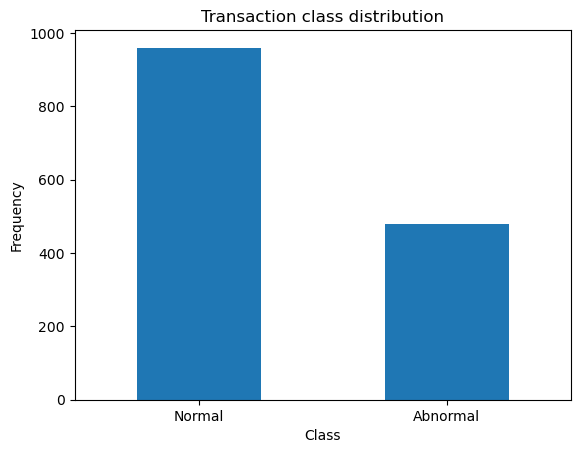

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 'lyingBack'과 'lyingRigh'는 Normal(0)로, 'jumping'은 Abnormal(1)로 설정
df['Class'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRigh'] else (1 if x == 'standingInElevatorStill' else None))

# 결측값 제거 (필요에 따라 적용)
df = df.dropna(subset=['Class'])

# Class별 샘플 수 세기
count_classes = pd.value_counts(df['Class'], sort=True)

# 막대 그래프 그리기
LABELS = ['Normal', 'Abnormal']
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [9]:
df['Class'].value_counts()

Class
0.0    960
1.0    480
Name: count, dtype: int64

In [10]:
Abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
Abnormal.shape

(480, 273)

In [11]:
normal.shape

(960, 273)

In [12]:
print(Abnormal.columns)
print(normal.columns)


Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)
Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max', 'LL_zmag_min',
       'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity', 'people',
       'Class'],
      dtype='object', length=273)


In [13]:
X_train = normal

In [14]:
X_test = pd.concat([Abnormal, normal])
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
2880,8.937266,9.4047,8.0865,0.038115,0.195230,-1.102231,0.555230,0.978610,0.19389,0.031068,...,0.142147,-0.156088,-0.014017,-0.29828,0.011292,0.106264,-0.004133,standingInElevatorStill,p1,1.0
2881,9.302032,10.3160,8.3804,0.085211,0.291910,0.844680,0.056612,0.868040,-0.47393,0.030213,...,-0.066606,-0.303351,-0.282180,-0.36879,0.000258,0.016064,-1.769565,standingInElevatorStill,p1,1.0
2882,8.953054,9.3659,8.3239,0.069296,0.263241,-0.772524,0.037707,0.281740,-0.17676,0.009970,...,-0.434619,-0.522859,-0.374500,-0.64586,0.007174,0.084697,-0.327907,standingInElevatorStill,p1,1.0
2883,9.147425,9.2762,8.9860,0.002632,0.051306,-0.316379,-0.102227,0.066942,-0.23617,0.004521,...,0.710560,-0.647750,-0.643280,-0.64978,0.000001,0.001137,1.161102,standingInElevatorStill,p1,1.0
2884,9.001449,9.2378,7.8201,0.063205,0.251407,-2.357976,-0.236014,0.355720,-0.67466,0.029706,...,0.611098,-0.642075,-0.620360,-0.64750,0.000023,0.004773,2.445061,standingInElevatorStill,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.342400,-9.42070,0.000242,...,0.401254,-0.410987,-0.382210,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.365700,-9.43560,0.000156,...,0.147180,-0.411248,-0.365810,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.362800,-9.43130,0.000214,...,0.032341,-0.409787,-0.379260,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.364900,-9.45390,0.000257,...,0.409508,-0.409101,-0.360740,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [15]:
X_train = normal.drop(['Class', 'activity', 'people'], axis=1)

In [16]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [17]:
X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,0.56276,9.725263e-07,0.000986,0.074676,-0.532664,-0.52993,-0.53521,9.585668e-07,0.000979,-0.193301
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,0.56394,6.211659e-07,0.000788,-0.181526,-0.531169,-0.52940,-0.53365,7.608973e-07,0.000872,-0.372381
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.56445,4.579046e-07,0.000677,-0.263115,-0.530569,-0.52873,-0.53222,5.160537e-07,0.000718,0.185587
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,0.56420,4.703523e-07,0.000686,-0.060925,-0.531167,-0.52962,-0.53283,4.975523e-07,0.000705,-0.145321
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,0.56455,5.467316e-07,0.000739,0.335811,-0.529804,-0.52706,-0.53251,1.292131e-06,0.001137,-0.026271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.34240,-9.42070,0.000242,...,-0.54522,9.195642e-05,0.009589,0.401254,-0.410987,-0.38221,-0.44605,9.935077e-05,0.009967,-0.597598
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.36570,-9.43560,0.000156,...,-0.55652,7.375030e-05,0.008588,0.147180,-0.411248,-0.36581,-0.43676,8.659481e-05,0.009306,1.021454
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.36280,-9.43130,0.000214,...,-0.53640,3.380089e-05,0.005814,0.032341,-0.409787,-0.37926,-0.43431,7.258946e-05,0.008520,0.431012
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.36490,-9.45390,0.000257,...,-0.54565,9.044032e-05,0.009510,0.409508,-0.409101,-0.36074,-0.44087,1.127801e-04,0.010620,1.368666


In [18]:
import numpy as np
import pandas as pd

# 원본 데이터 복사 (원본 보존)
train_no_noise = X_train.copy()

# 노이즈 강도 설정
noise_factor = 0.5  

# train 데이터의 모든 컬럼에 노이즈 추가
train = X_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_train.shape
)


# 노이즈 추가 후 데이터 확인
train


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.310275,-3.905968,-4.123163,-0.877589,-0.339357,0.395113,-0.683735,-0.613168,-0.587369,1.094172,...,0.092451,-0.663548,-0.480881,-0.652552,-0.571352,-0.658979,-1.013747,-0.296448,-0.081340,-0.062863
961,-4.462828,-4.781344,-4.659336,0.169958,0.035928,1.566902,-0.718601,-0.558892,-1.038693,0.633914,...,0.925150,-0.452212,0.422750,0.153982,0.007191,-0.142648,-0.544383,0.472999,0.292768,-0.767116
962,-5.060585,-3.554496,-4.826209,0.529509,-0.231020,0.094757,-0.841522,-0.339858,0.581306,1.037783,...,-0.091308,0.434608,-0.439126,-1.190492,-0.367835,-0.304097,-0.199976,-0.065875,-0.052111,-0.143324
963,-4.519879,-3.897760,-4.734281,-0.610879,0.522449,0.841080,-0.730148,-0.614478,-1.120385,0.312626,...,-0.112777,-0.646487,0.359058,0.003363,-0.893474,-1.501279,-0.160870,-0.201274,0.283132,0.031807
964,-3.832276,-5.290678,-5.389320,-0.002164,-0.971960,0.251118,-0.619204,0.269343,-0.106986,-0.179766,...,0.162855,-0.030454,0.805870,0.162500,0.078082,-0.491903,-0.410087,0.481619,0.484215,-0.238598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.062673,1.765232,2.819844,0.308142,-0.078428,-0.253357,-9.154521,-9.673359,-9.408724,-0.356922,...,-0.757581,0.268089,0.057591,-0.377452,-0.630252,-0.386910,-0.556088,-0.289712,-0.110900,0.303051
1916,2.622582,2.864192,1.837789,0.275431,-0.417617,-0.386267,-9.836581,-8.764942,-8.821357,0.225566,...,0.272225,0.306613,-0.272013,0.138416,0.057153,-0.595741,-0.065256,-0.380740,0.015177,0.497771
1917,1.681662,2.596287,2.786618,0.324883,-0.060219,-0.289895,-9.679924,-10.082959,-10.925518,0.070846,...,-1.107343,0.172233,-0.024373,0.107987,-0.709554,-0.934559,-0.325752,0.919931,-0.057290,1.514322
1918,3.034916,3.160058,2.289867,0.261295,0.487367,-0.082160,-8.658761,-8.119256,-9.302414,0.503109,...,-0.113941,-1.071227,0.360072,0.410025,-0.355407,-0.870592,0.356267,0.552384,-0.450979,1.643538


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 가정: X_test는 이미 정의된 데이터프레임입니다.

# 'activity', 'people', 'Class' 열을 제외한 데이터만 추출하여 스케일링

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)

# 스케일링된 데이터를 DataFrame으로 변환
scaled_X_train = pd.DataFrame(scaled_features, columns=X_train.columns)

# 결과 출력
scaled_X_train

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
0,-1.284643,-1.287445,-1.264521,-0.091235,-0.130391,1.293948,0.892481,0.886692,0.899934,-0.116043,...,0.741525,-0.141289,-0.293535,0.120756,-0.391035,-0.398140,-0.383163,-0.128573,-0.323099,-0.219429
1,-1.265346,-1.239346,-1.256829,0.002035,0.480205,2.127967,0.897184,0.889847,0.891559,-0.100364,...,0.744028,-0.142472,-0.326798,-0.402114,-0.388128,-0.397107,-0.380127,-0.129875,-0.350275,-0.571525
2,-1.273802,-1.282112,-1.254051,-0.079420,-0.026906,1.498289,0.894115,0.884687,0.899934,-0.124633,...,0.745110,-0.143022,-0.345519,-0.568625,-0.386960,-0.395801,-0.377344,-0.131486,-0.389454,0.525521
3,-1.254504,-1.233798,-1.261957,0.018495,0.560377,1.448807,0.907144,0.911679,0.909958,0.027760,...,0.744580,-0.142980,-0.343984,-0.155985,-0.388123,-0.397536,-0.378531,-0.131608,-0.392762,-0.125092
4,-1.263233,-1.271448,-1.243439,-0.092685,-0.144164,0.684672,0.902054,0.893231,0.913451,-0.113683,...,0.745322,-0.142723,-0.334982,0.653693,-0.385472,-0.392546,-0.377909,-0.126378,-0.282970,0.108977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.387633,1.370657,1.404301,-0.121786,-0.534929,0.335144,-1.155406,-1.165444,-1.140190,-0.159380,...,-1.608766,0.165187,1.151541,0.787254,-0.154296,-0.110222,-0.209634,0.519106,1.964745,-1.014336
956,1.385095,1.369937,1.401595,-0.121527,-0.529207,0.771827,-1.156979,-1.170801,-1.143635,-0.164200,...,-1.632736,0.103861,0.983304,0.268727,-0.154805,-0.078257,-0.191553,0.435138,1.796282,2.168957
957,1.385571,1.370081,1.395861,-0.119890,-0.495238,0.025033,-1.156633,-1.170135,-1.142641,-0.160933,...,-1.590056,-0.030708,0.517367,0.034356,-0.151962,-0.104472,-0.186785,0.342946,1.596299,1.008062
958,1.387512,1.370549,1.400384,-0.121236,-0.522880,-0.186899,-1.156556,-1.170617,-1.147865,-0.158533,...,-1.609678,0.160080,1.138208,0.804099,-0.150627,-0.068375,-0.199553,0.607507,2.130780,2.851627


In [20]:
# 입력 데이터의 차원 수를 정의합니다. X_train의 열 개수와 동일하게 설정합니다.
input_dim = X_train.shape[1]

# 인코딩 차원 수를 설정합니다. 이는 잠재 공간(latent space)의 크기이며, 원하는 값으로 조정할 수 있습니다.
encoding_dim = 14  # 압축할 차원의 크기

# 입력 레이어를 정의합니다. 입력 데이터의 형태를 지정합니다.
input_layer = Input(shape=(input_dim,))

# 인코딩 과정: 입력 레이어에서 14개의 뉴런을 가진 은닉층으로 압축합니다.
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# 인코딩된 값을 절반 크기의 은닉층으로 한 번 더 압축합니다.
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 디코딩 과정: 인코딩된 값을 다시 원래 차원의 절반 크기 은닉층으로 복원합니다.
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)

# 원래 입력 차원 크기로 복원하는 출력 레이어를 정의합니다.
# 출력값은 0과 1 사이로 제한하기 위해 'sigmoid' 활성화 함수를 사용합니다.
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 입력 레이어와 출력 레이어를 연결하여 오토인코더 모델을 생성합니다.
autoencoder = Model(inputs=input_layer, outputs=decoded)

# 오토인코더 모델을 컴파일합니다.
# Adam 옵티마이저를 사용하며, 학습률(learning_rate)은 0.001로 설정합니다.
# 손실 함수로 평균 제곱 오차(mse)를 사용하여 입력과 출력 간의 차이를 최소화합니다.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 모델의 요약 정보를 출력하여 모델 구조를 확인합니다.
autoencoder.summary()

Metal device set to: Apple M2 Pro


2024-10-22 15:07:48.651967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-22 15:07:48.652672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense (Dense)               (None, 14)                3794      
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 270)               2160      
                                                                 
Total params: 6,115
Trainable params: 6,115
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(train,train_no_noise, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50


2024-10-22 15:07:49.199209: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-22 15:07:49.540854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 89ms/step - loss: 5.7660 - val_loss: 5.6495
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 5.7498 - val_loss: 5.6390
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 5.7379 - val_loss: 5.6237
Epoch 4/50
1/4 [======>.......................] - ETA: 0s - loss: 5.8034

2024-10-22 15:07:50.043713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 11ms/step - loss: 5.7201 - val_loss: 5.5988
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 5.6901 - val_loss: 5.5628
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 5.6474 - val_loss: 5.5152
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 5.5930 - val_loss: 5.4573
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 5.5276 - val_loss: 5.3906
Epoch 9/50
4/4 [==============================] - 0s 9ms/step - loss: 5.4552 - val_loss: 5.3186
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 5.3795 - val_loss: 5.2457
Epoch 11/50
4/4 [==============================] - 0s 10ms/step - loss: 5.3060 - val_loss: 5.1789
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 5.2396 - val_loss: 5.1214
Epoch 13/50
4/4 [==============================] - 0s 11ms/step - loss: 5.1846 - val_loss: 5.0744
Epoch 14/50
4/4 [======================

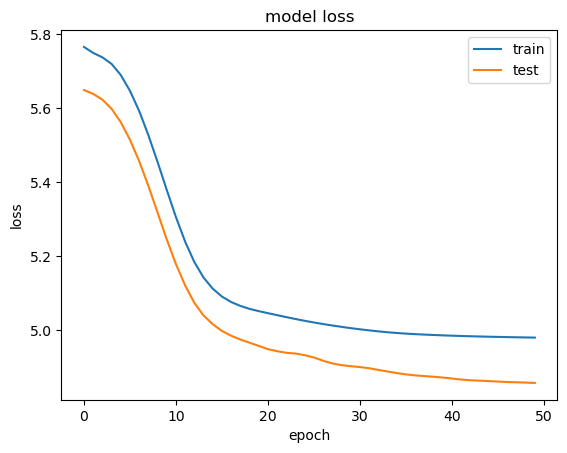

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [23]:
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
2880,8.937266,9.4047,8.0865,0.038115,0.195230,-1.102231,0.555230,0.978610,0.19389,0.031068,...,0.142147,-0.156088,-0.014017,-0.29828,0.011292,0.106264,-0.004133,standingInElevatorStill,p1,1.0
2881,9.302032,10.3160,8.3804,0.085211,0.291910,0.844680,0.056612,0.868040,-0.47393,0.030213,...,-0.066606,-0.303351,-0.282180,-0.36879,0.000258,0.016064,-1.769565,standingInElevatorStill,p1,1.0
2882,8.953054,9.3659,8.3239,0.069296,0.263241,-0.772524,0.037707,0.281740,-0.17676,0.009970,...,-0.434619,-0.522859,-0.374500,-0.64586,0.007174,0.084697,-0.327907,standingInElevatorStill,p1,1.0
2883,9.147425,9.2762,8.9860,0.002632,0.051306,-0.316379,-0.102227,0.066942,-0.23617,0.004521,...,0.710560,-0.647750,-0.643280,-0.64978,0.000001,0.001137,1.161102,standingInElevatorStill,p1,1.0
2884,9.001449,9.2378,7.8201,0.063205,0.251407,-2.357976,-0.236014,0.355720,-0.67466,0.029706,...,0.611098,-0.642075,-0.620360,-0.64750,0.000023,0.004773,2.445061,standingInElevatorStill,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.342400,-9.42070,0.000242,...,0.401254,-0.410987,-0.382210,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.365700,-9.43560,0.000156,...,0.147180,-0.411248,-0.365810,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.362800,-9.43130,0.000214,...,0.032341,-0.409787,-0.379260,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.364900,-9.45390,0.000257,...,0.409508,-0.409101,-0.360740,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [24]:
testdata = X_test['Class']
X_test = X_test.drop(['activity', 'people', 'Class'], axis=1)


In [25]:
predictions = autoencoder.predict(X_test)


45/45 [==============================] - 0s 2ms/step


2024-10-22 15:07:55.174431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [26]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
len(mse)

1440

In [27]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testdata})
error_df.describe()

,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,5.081130,0.333333
std,1.298487,0.471568
min,4.631283,0.000000
25%,4.789413,0.000000
50%,5.002062,0.000000
75%,5.166854,1.000000
max,46.431100,1.000000


In [31]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

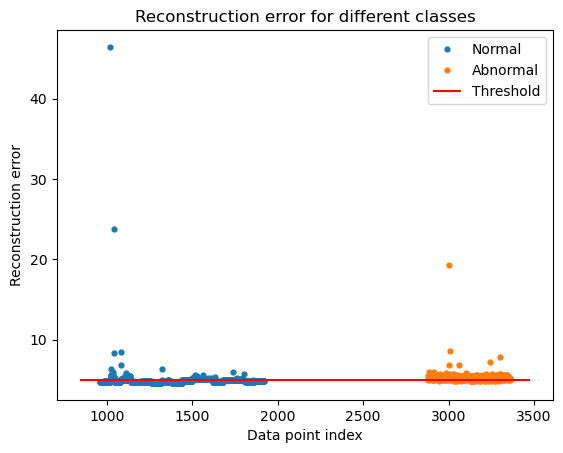

In [32]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

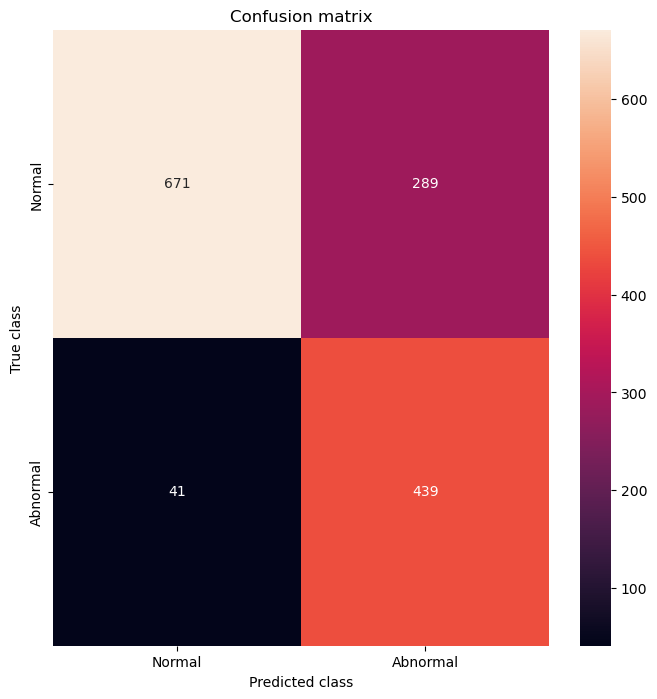

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80       960
         1.0       0.60      0.91      0.73       480

    accuracy                           0.77      1440
   macro avg       0.77      0.81      0.76      1440
weighted avg       0.83      0.77      0.78      1440



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [43]:
df = pd.read_csv('./DSA_features.csv')

In [44]:
df.shape

(9120, 272)

In [45]:
LABELS = ["Normal", "Abnormal"]

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_64135/1219535038.py:11: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


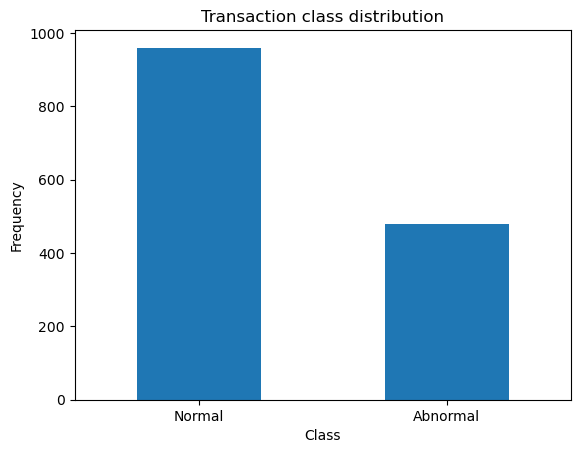

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 'lyingBack'과 'lyingRigh'는 Normal(0)로, 'jumping'은 Abnormal(1)로 설정
df['Class'] = df['activity'].apply(lambda x: 0 if x in ['lyingBack', 'lyingRigh'] else (1 if x == 'standingInElevatorStill' else None))

# 결측값 제거 (필요에 따라 적용)
df = df.dropna(subset=['Class'])

# Class별 샘플 수 세기
count_classes = pd.value_counts(df['Class'], sort=True)

# 막대 그래프 그리기
LABELS = ['Normal', 'Abnormal']
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [47]:
df['Class'].value_counts()

Class
0.0    960
1.0    480
Name: count, dtype: int64

In [48]:
Abnormal = df[df.Class == 1]
normal = df[df.Class == 0]
Abnormal.shape

(480, 273)

In [49]:
X_train = normal
X_train = normal.drop(['Class', 'activity', 'people'], axis=1)


In [50]:
X_test = pd.concat([Abnormal, normal])
X_test

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people,Class
2880,8.937266,9.4047,8.0865,0.038115,0.195230,-1.102231,0.555230,0.978610,0.19389,0.031068,...,0.142147,-0.156088,-0.014017,-0.29828,0.011292,0.106264,-0.004133,standingInElevatorStill,p1,1.0
2881,9.302032,10.3160,8.3804,0.085211,0.291910,0.844680,0.056612,0.868040,-0.47393,0.030213,...,-0.066606,-0.303351,-0.282180,-0.36879,0.000258,0.016064,-1.769565,standingInElevatorStill,p1,1.0
2882,8.953054,9.3659,8.3239,0.069296,0.263241,-0.772524,0.037707,0.281740,-0.17676,0.009970,...,-0.434619,-0.522859,-0.374500,-0.64586,0.007174,0.084697,-0.327907,standingInElevatorStill,p1,1.0
2883,9.147425,9.2762,8.9860,0.002632,0.051306,-0.316379,-0.102227,0.066942,-0.23617,0.004521,...,0.710560,-0.647750,-0.643280,-0.64978,0.000001,0.001137,1.161102,standingInElevatorStill,p1,1.0
2884,9.001449,9.2378,7.8201,0.063205,0.251407,-2.357976,-0.236014,0.355720,-0.67466,0.029706,...,0.611098,-0.642075,-0.620360,-0.64750,0.000023,0.004773,2.445061,standingInElevatorStill,p1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.620502,2.6592,2.5891,0.000199,0.014113,0.148452,-9.392025,-9.342400,-9.42070,0.000242,...,0.401254,-0.410987,-0.382210,-0.44605,0.000099,0.009967,-0.597598,lyingRigh,p8,0.0
1916,2.613423,2.6572,2.5815,0.000207,0.014387,0.368746,-9.398851,-9.365700,-9.43560,0.000156,...,0.147180,-0.411248,-0.365810,-0.43676,0.000087,0.009306,1.021454,lyingRigh,p8,0.0
1917,2.614750,2.6576,2.5654,0.000257,0.016018,-0.007991,-9.397350,-9.362800,-9.43130,0.000214,...,0.032341,-0.409787,-0.379260,-0.43431,0.000073,0.008520,0.431012,lyingRigh,p8,0.0
1918,2.620167,2.6589,2.5781,0.000216,0.014691,-0.114904,-9.397014,-9.364900,-9.45390,0.000257,...,0.409508,-0.409101,-0.360740,-0.44087,0.000113,0.010620,1.368666,lyingRigh,p8,0.0


In [51]:
import numpy as np
import pandas as pd

# 원본 데이터 복사 (원본 보존)
train_no_noise = X_train.copy()

# 노이즈 강도 설정
noise_factor = 0.5  

# train 데이터의 모든 컬럼에 노이즈 추가
train = X_train + noise_factor * np.random.normal(
    loc=0.0, scale=1.0, size=X_train.shape
)


# 노이즈 추가 후 데이터 확인
train


,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_min,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew
960,-4.041187,-4.740671,-4.791807,-0.343815,0.169117,0.310851,-0.698177,-0.474232,-0.319663,0.131252,...,0.791746,-0.576299,0.059208,0.532437,0.102186,0.100587,-0.164586,-0.882095,0.054141,0.219546
961,-4.339485,-4.380108,-5.635166,-0.028281,-0.250112,1.089653,-1.492664,-0.383376,0.160377,0.186647,...,-0.310416,-0.159095,-0.403342,-0.392745,-0.082859,-0.181031,-0.440476,0.840788,0.514785,-0.462410
962,-4.164403,-4.186866,-3.900764,-0.938829,-0.883857,1.085164,-0.081647,-0.338916,-0.388376,0.342778,...,0.586871,0.265696,-0.032767,0.140056,-1.038171,-0.410681,-0.155347,-0.022731,-0.481716,0.775785
963,-5.033394,-5.136042,-5.616929,-0.877872,0.756927,1.416329,-0.760188,-0.111546,-0.484623,0.869433,...,0.525673,-0.372044,0.259507,-0.046105,-0.281060,0.206980,-0.639641,-1.007887,-0.578023,-0.482316
964,-5.064080,-4.371462,-4.831278,0.377560,0.947549,0.321022,-0.673319,-0.345064,-0.791752,1.180792,...,0.033602,0.830755,-0.186557,0.887958,-0.720083,-0.081168,-0.170211,0.031280,-0.314031,-0.070234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,2.659628,2.241008,2.674670,0.004576,-0.089934,-0.473354,-8.753888,-9.949182,-9.194497,-0.076305,...,-0.982902,-1.144961,0.201829,-1.021252,-0.497312,-0.168551,-0.939092,-0.558760,-0.752161,-0.579573
1916,1.870920,2.784521,3.071035,-0.369264,1.008042,-0.420340,-9.674517,-9.993186,-8.934503,0.112872,...,-0.928911,-0.017277,-0.051323,0.912355,-0.234438,-0.806221,-0.674762,0.029778,0.038590,1.219549
1917,2.483550,2.466886,1.783824,-0.695903,-0.094802,-0.580000,-9.504340,-8.728396,-9.084984,-0.274227,...,-0.251000,-0.025604,-0.457668,-0.443736,-1.430964,-0.732093,-1.260971,0.230769,-0.661585,0.892963
1918,2.592469,3.378294,2.491783,-1.269556,0.166103,0.376073,-8.736578,-9.639413,-9.500525,0.721703,...,-1.060911,-0.890678,-0.654949,0.737327,-0.573284,-0.223046,-0.385361,-0.199920,-0.179392,0.819148


In [52]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 입력 데이터의 차원 수 정의 (예: X_train 데이터의 열 개수).
input_dim = X_train.shape[1]  # 입력 차원 크기

# 인코딩 차원 수 설정 (압축할 차원).
encoding_dim = 14  # 잠재 공간의 크기

# **입력 레이어 정의**.
input_layer = Input(shape=(input_dim,))

# **비대칭 인코딩 과정**: 
# 입력 데이터를 차례로 64, 32, 14차원으로 압축.
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # 최종 잠재 공간

# **비대칭 디코딩 과정**:
# 14차원 잠재 공간을 원래 입력 차원으로 복원. 
# 더 많은 레이어를 사용해 복원 과정이 복잡하도록 설계.
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)

decoded = Dense(256, activation='relu')(decoded)  # 추가 복원 레이어
decoded = Dense(input_dim, activation='sigmoid')(decoded)  # 최종 복원

# **Autoencoder 모델 생성** (입력과 출력 정의).
autoencoder = Model(inputs=input_layer, outputs=decoded)

# **모델 컴파일**: Adam 옵티마이저와 MSE 손실 함수 사용.
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# **모델 구조 출력**.
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 270)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                17344     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 14)                462       
                                                                 
 dense_7 (Dense)             (None, 32)                480       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320

In [53]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(train, train_no_noise, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50


2024-10-22 15:09:03.184602: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 1s 120ms/step - loss: 5.7088 - val_loss: 5.5460
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 5.5204 - val_loss: 5.3286
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 5.2296 - val_loss: 5.1123
Epoch 4/50


2024-10-22 15:09:03.790343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 12ms/step - loss: 5.0577 - val_loss: 5.0195
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 5.0008 - val_loss: 4.9495
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 4.9643 - val_loss: 4.9464
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 4.9523 - val_loss: 4.9509
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 4.9473 - val_loss: 4.9498
Epoch 9/50
4/4 [==============================] - 0s 11ms/step - loss: 4.9422 - val_loss: 4.9470
Epoch 10/50
4/4 [==============================] - 0s 11ms/step - loss: 4.9321 - val_loss: 4.9296
Epoch 11/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9249 - val_loss: 4.9422
Epoch 12/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9208 - val_loss: 4.9195
Epoch 13/50
4/4 [==============================] - 0s 12ms/step - loss: 4.9170 - val_loss: 4.9247
Epoch 14/50
4/4 [====================

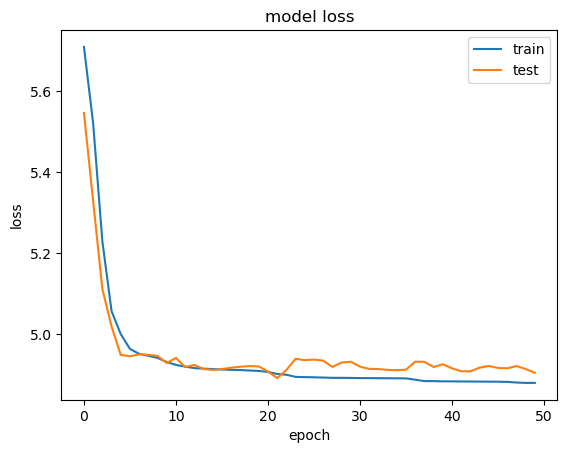

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [55]:
testdata = X_test['Class']
X_test = X_test.drop(['activity', 'people', 'Class'], axis=1)


In [56]:
predictions = autoencoder.predict(X_test)


45/45 [==============================] - 0s 2ms/step


2024-10-22 15:09:06.202163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [57]:
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': testdata})
error_df.describe()

,reconstruction_error,true_class
count,1440.000000,1440.000000
mean,5.081130,0.333333
std,1.298487,0.471568
min,4.631283,0.000000
25%,4.789413,0.000000
50%,5.002062,0.000000
75%,5.166854,1.000000
max,46.431100,1.000000


In [79]:
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = 5

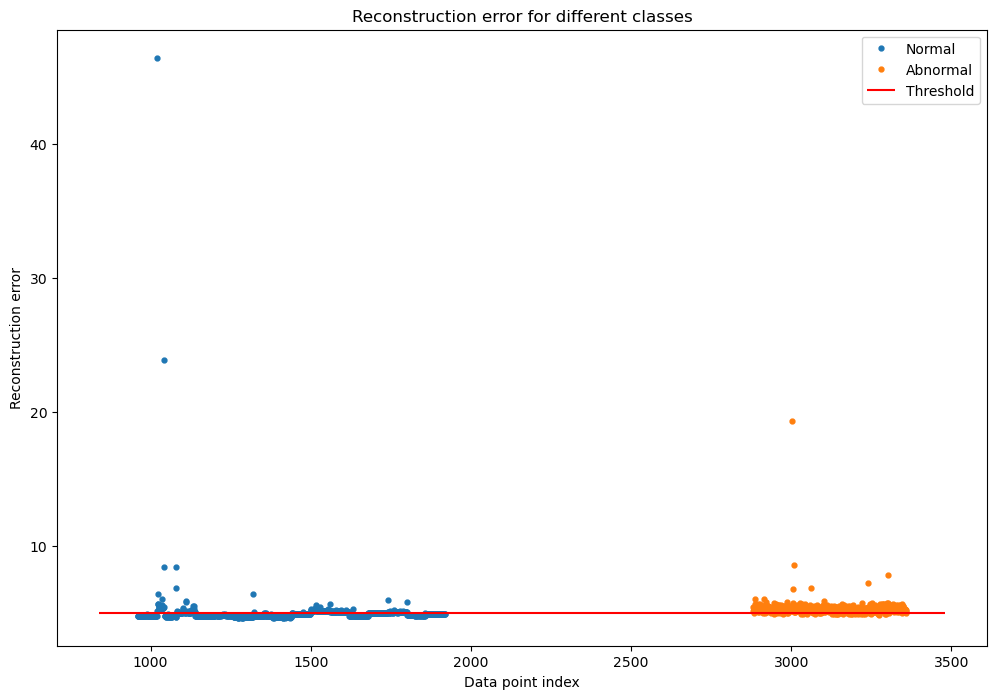

In [80]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots(figsize=(12, 8))  # 그래프 크기 조정

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label="Abnormal" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

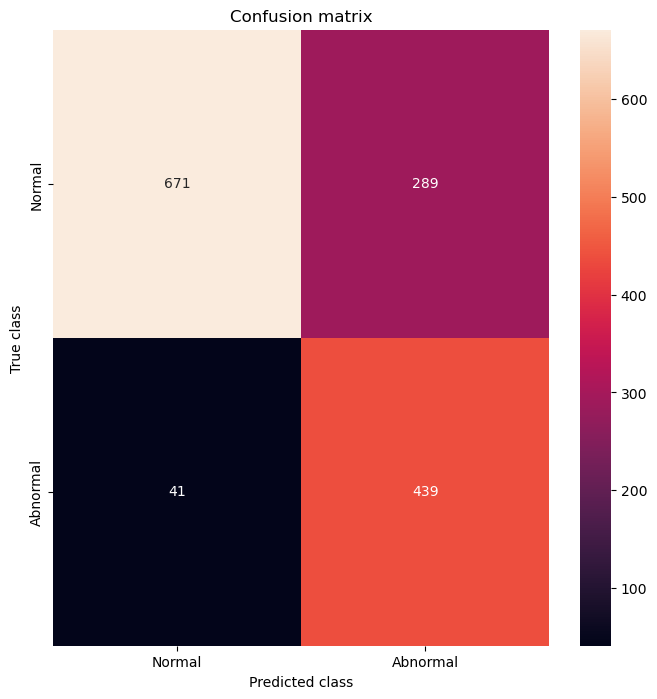

              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80       960
         1.0       0.60      0.91      0.73       480

    accuracy                           0.77      1440
   macro avg       0.77      0.81      0.76      1440
weighted avg       0.83      0.77      0.78      1440



In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))